In [1]:
import numpy as np
from scipy.io import loadmat

import os

import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot; vapeplot.set_palette('vaporwave')

In [2]:
data = loadmat('../../data/square/square_nearest_neighbors.mat')
xs = data['x']
labels = data['labels']


data = 'square'
policies = [
    'greedy',
    'round robin greedy'
]
linestyles = [
    '-',
    '--'
]
assert len(policies) == len(linestyles)

n_exps = 20
n_classes = 6
budget = 100

basepath = os.path.join('../../data/results', data)


queries = -1 * np.ones((len(policies), n_exps, budget), dtype=int)

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        tmp_queries = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__queries__{i + 1}.csv'), 
            dtype=int
        ).flatten() - 1
        
        queries[p_ind, i, :] = tmp_queries
        
assert np.all(queries != -1)

In [3]:
queries

array([[[156, 458, 324, ..., 456, 352, 294],
        [ 54,  14, 324, ..., 352, 294, 381],
        [351,  75, 281, ..., 412,  23, 189],
        ...,
        [120,  22, 317, ...,  23, 189, 130],
        [ 96, 253, 181, ..., 294, 381, 172],
        [418, 118, 452, ...,  27, 172, 250]],

       [[458, 156, 201, ..., 294, 213,  82],
        [ 14, 156,  54, ..., 197, 213,  82],
        [ 53, 351,  75, ..., 412, 172, 188],
        ...,
        [ 22, 470,  77, ..., 412, 213,  82],
        [181, 208,  96, ..., 197, 172, 281],
        [118, 470, 354, ..., 412, 172,  82]]])

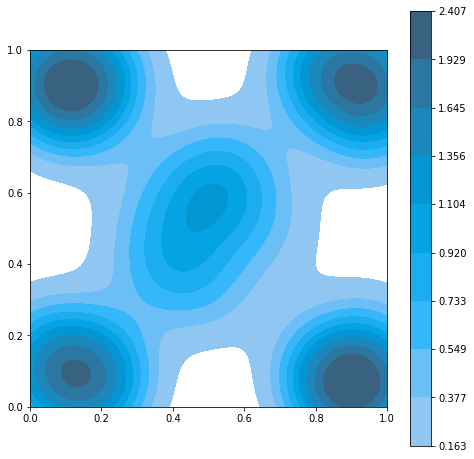

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.kdeplot(
    x=xs[queries[0], 0].flatten(), 
    y=xs[queries[0], 1].flatten(), 
    cbar=True, fill=True, ax=ax
)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_aspect('equal', 'box');

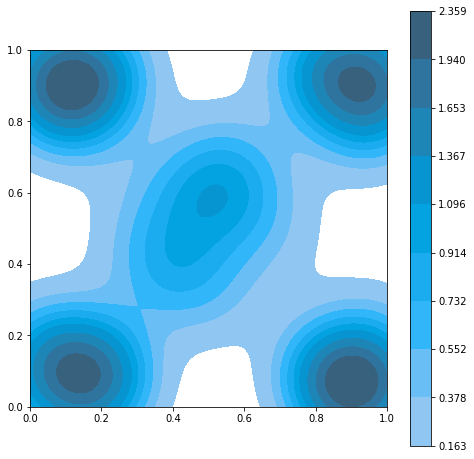

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.kdeplot(
    x=xs[queries[1], 0].flatten(), 
    y=xs[queries[1], 1].flatten(), 
    cbar=True, fill=True, ax=ax
)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_aspect('equal', 'box');